In [1]:
from aco import ACOio, datetime, timedelta
from matplotlib import pyplot as plt

%matplotlib inline

In [2]:
loader = ACOio('./../raw/')

In [3]:
date = datetime(day=18, month=2, year=2016, hour=7, minute=55)
src = loader.load(date)

In [4]:
snip = src[timedelta(seconds=7):timedelta(seconds=11)]

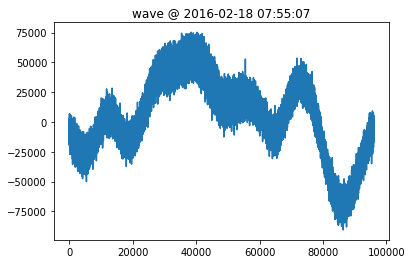

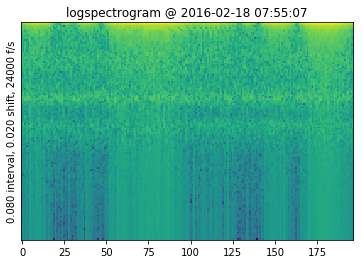

In [5]:
snip.View()
snip.View('logspectrogram')
snip.Listen()

In [6]:
noise = snip[timedelta(seconds=0):timedelta(seconds=.8)]
noise.Listen()

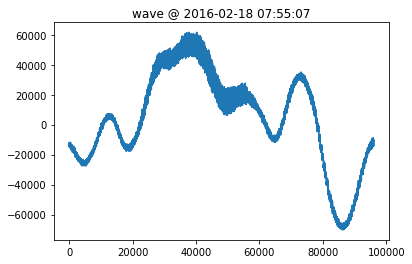

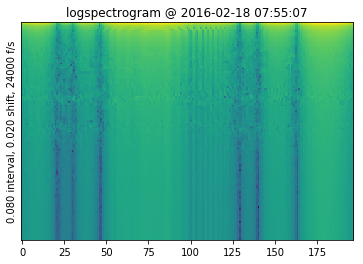

In [7]:
clean = snip.subtract(noise)
clean.View()
clean.View('logspectrogram')
clean.Listen()

/home/probinso/git/Whales/code/aco.py:177: UserWarning: Only 0.417 of signal represented
  warnings.warn(f'Only {fs_ratio:.3f} of signal represented', UserWarning)


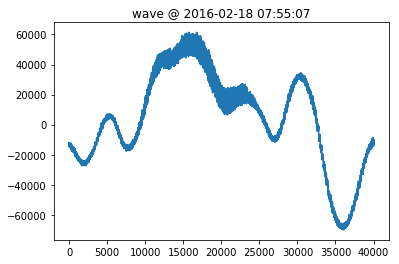

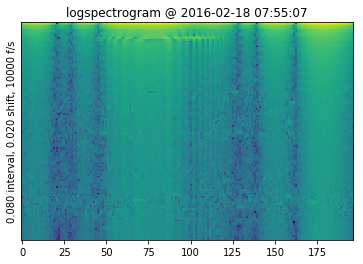

In [8]:
down = clean.resample(40000)
down.View()
down.View('logspectrogram')
down.Listen()

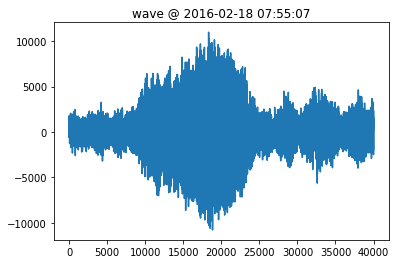

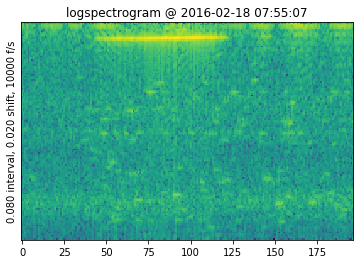

In [18]:
centered = down.remove_dc(levels=13)
centered.View()
centered.View('logspectrogram')
centered.Listen()

(21120.0, 59520.0)

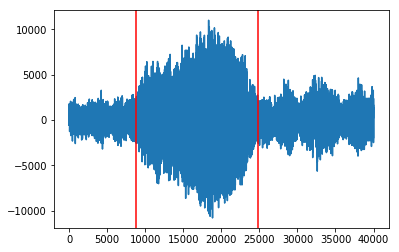

In [22]:
fig = plt.figure()
_ = plt.plot(centered._data)
plt.axvline(8800, color='red')
plt.axvline(24800, color='red')
(8800 / centered._fs) * snip._fs, (24800 / centered._fs) * snip._fs

In [29]:
timedelta(seconds=8800/centered._fs).total_seconds(),timedelta(seconds=24800/centered._fs).total_seconds()


(0.88, 2.48)

(8800.0, 24800.0)

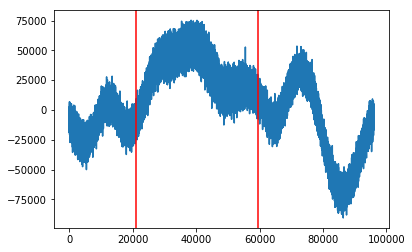

In [21]:
fig = plt.figure()
_ = plt.plot(snip._data)
plt.axvline(21120, color='red')
plt.axvline(59520, color='red')
centered.Listen()
(21120 / snip._fs) * centered._fs, (59520 / snip._fs) * centered._fs

/home/probinso/git/Whales/code/aco.py:177: UserWarning: Only 0.417 of signal represented
  warnings.warn(f'Only {fs_ratio:.3f} of signal represented', UserWarning)


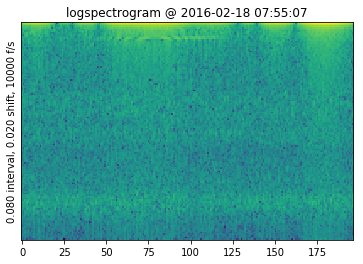

In [12]:
snip.resample(40000).View('logspectrogram')